In [ ]:
# Checking for bug

In [1]:
# importing packages and modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import minimize
from utils import *
from plotting_utils import *
from analysis_utils import *
import dglm_hmm2
import dglm_hmm1
from scipy.stats import multivariate_normal, norm
# import jax

sns.set_context("talk")

In [2]:
# setting hyperparameters
S = 10 # sessions
T = 5000 # trials per session
N = T * S # total data points
C = 2 # classes
K = 2 # states
D = 2 # features (sensory & bias)

Session indicies
[0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000]
(50000, 2, 2, 2)


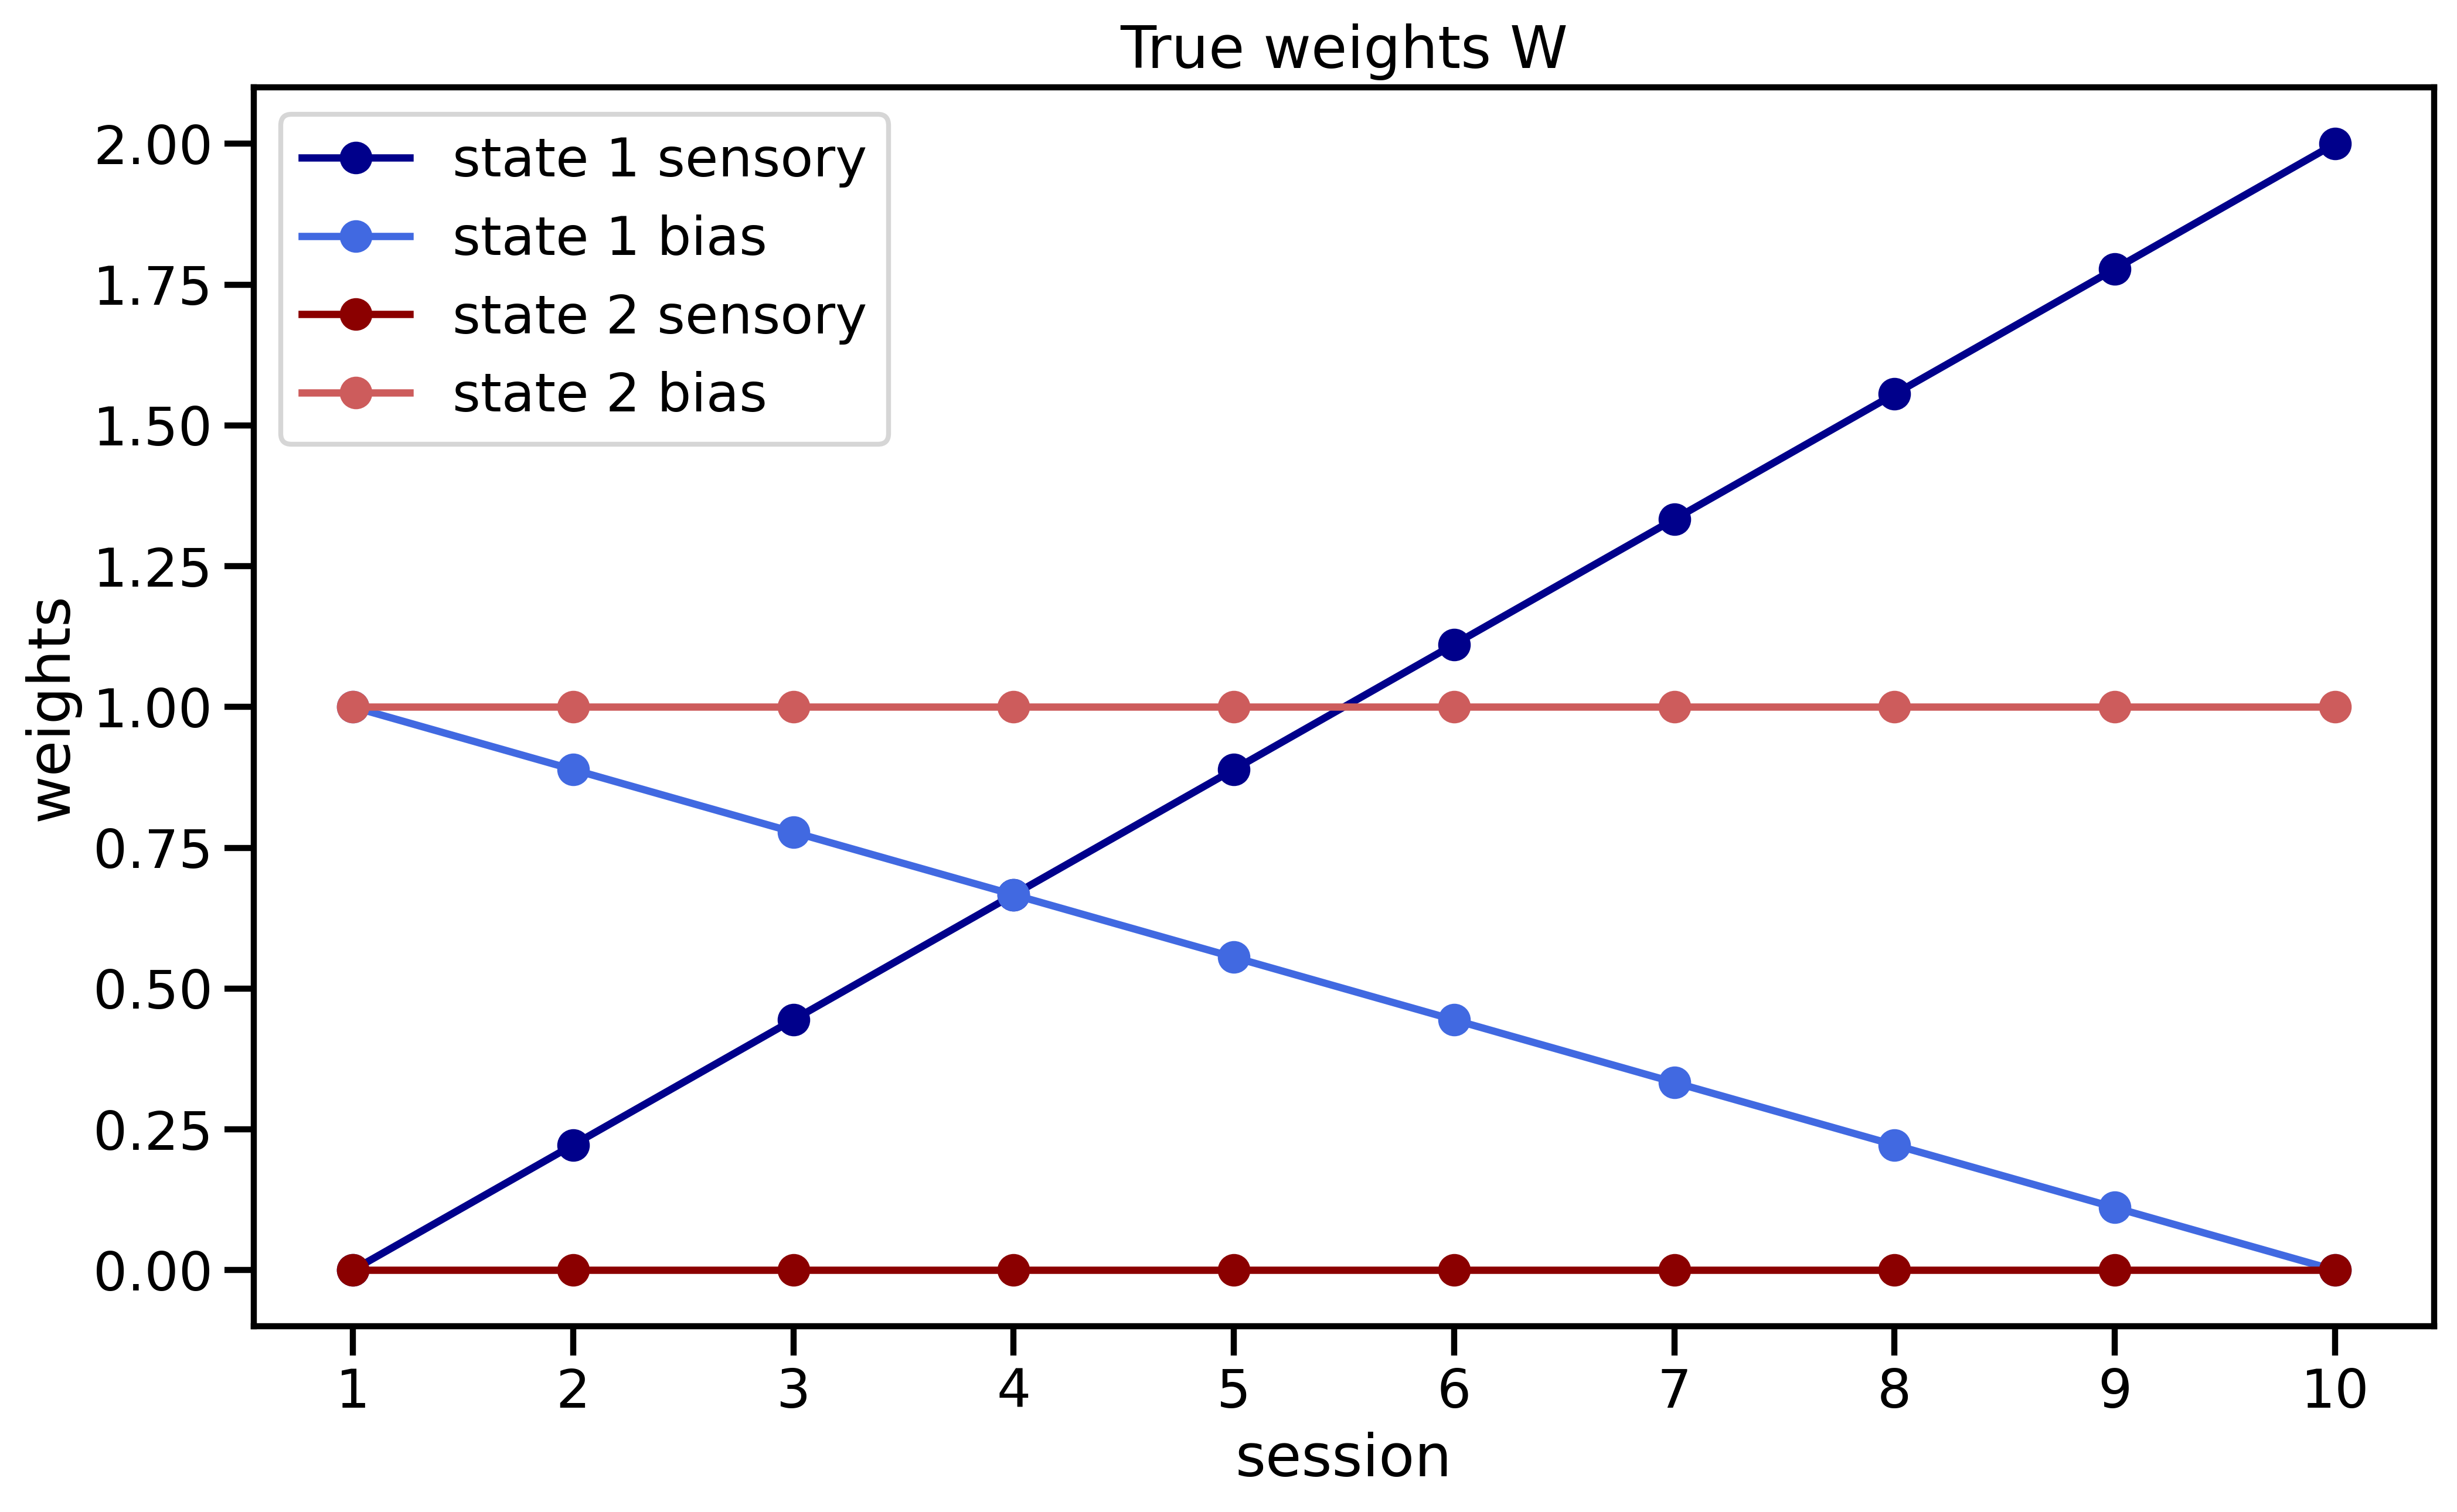

In [3]:
# True Weights and Session Start Indices
ourW = np.zeros((S,K,D))
ourW[:,0,1] = np.linspace(0,2,S) # state 1 sensory (increasing)
ourW[:,0,0] = np.linspace(1,0,S) # state 1 bias (decreasing)
ourW[:,1,1] = 0 # state 2 sensory (flat 0)
ourW[:,1,0] = 1 # state 2 bias (flat 1)
trueW = np.zeros((N,K,D,C))
# change weight format to have session*trials points
sessInd = []
for sess in range(0,S):
    sessInd.append(sess*T)
    for t in range(0,T):
        trueW[sess*T+t,:,:,1] = ourW[sess,:,:]
sessInd.append(N)
print("Session indicies")
print(sessInd)

testSessInd = []
for sess in range(0,S+1):
    testSessInd.append(sess*5000)

print(trueW.shape)
fig, axes = plt.subplots(1, figsize = (12,7), dpi=400)
plotting_weights(w=trueW, sessInd=sessInd, axes=axes, trueW=None, title='True weights W', save_fig=False)

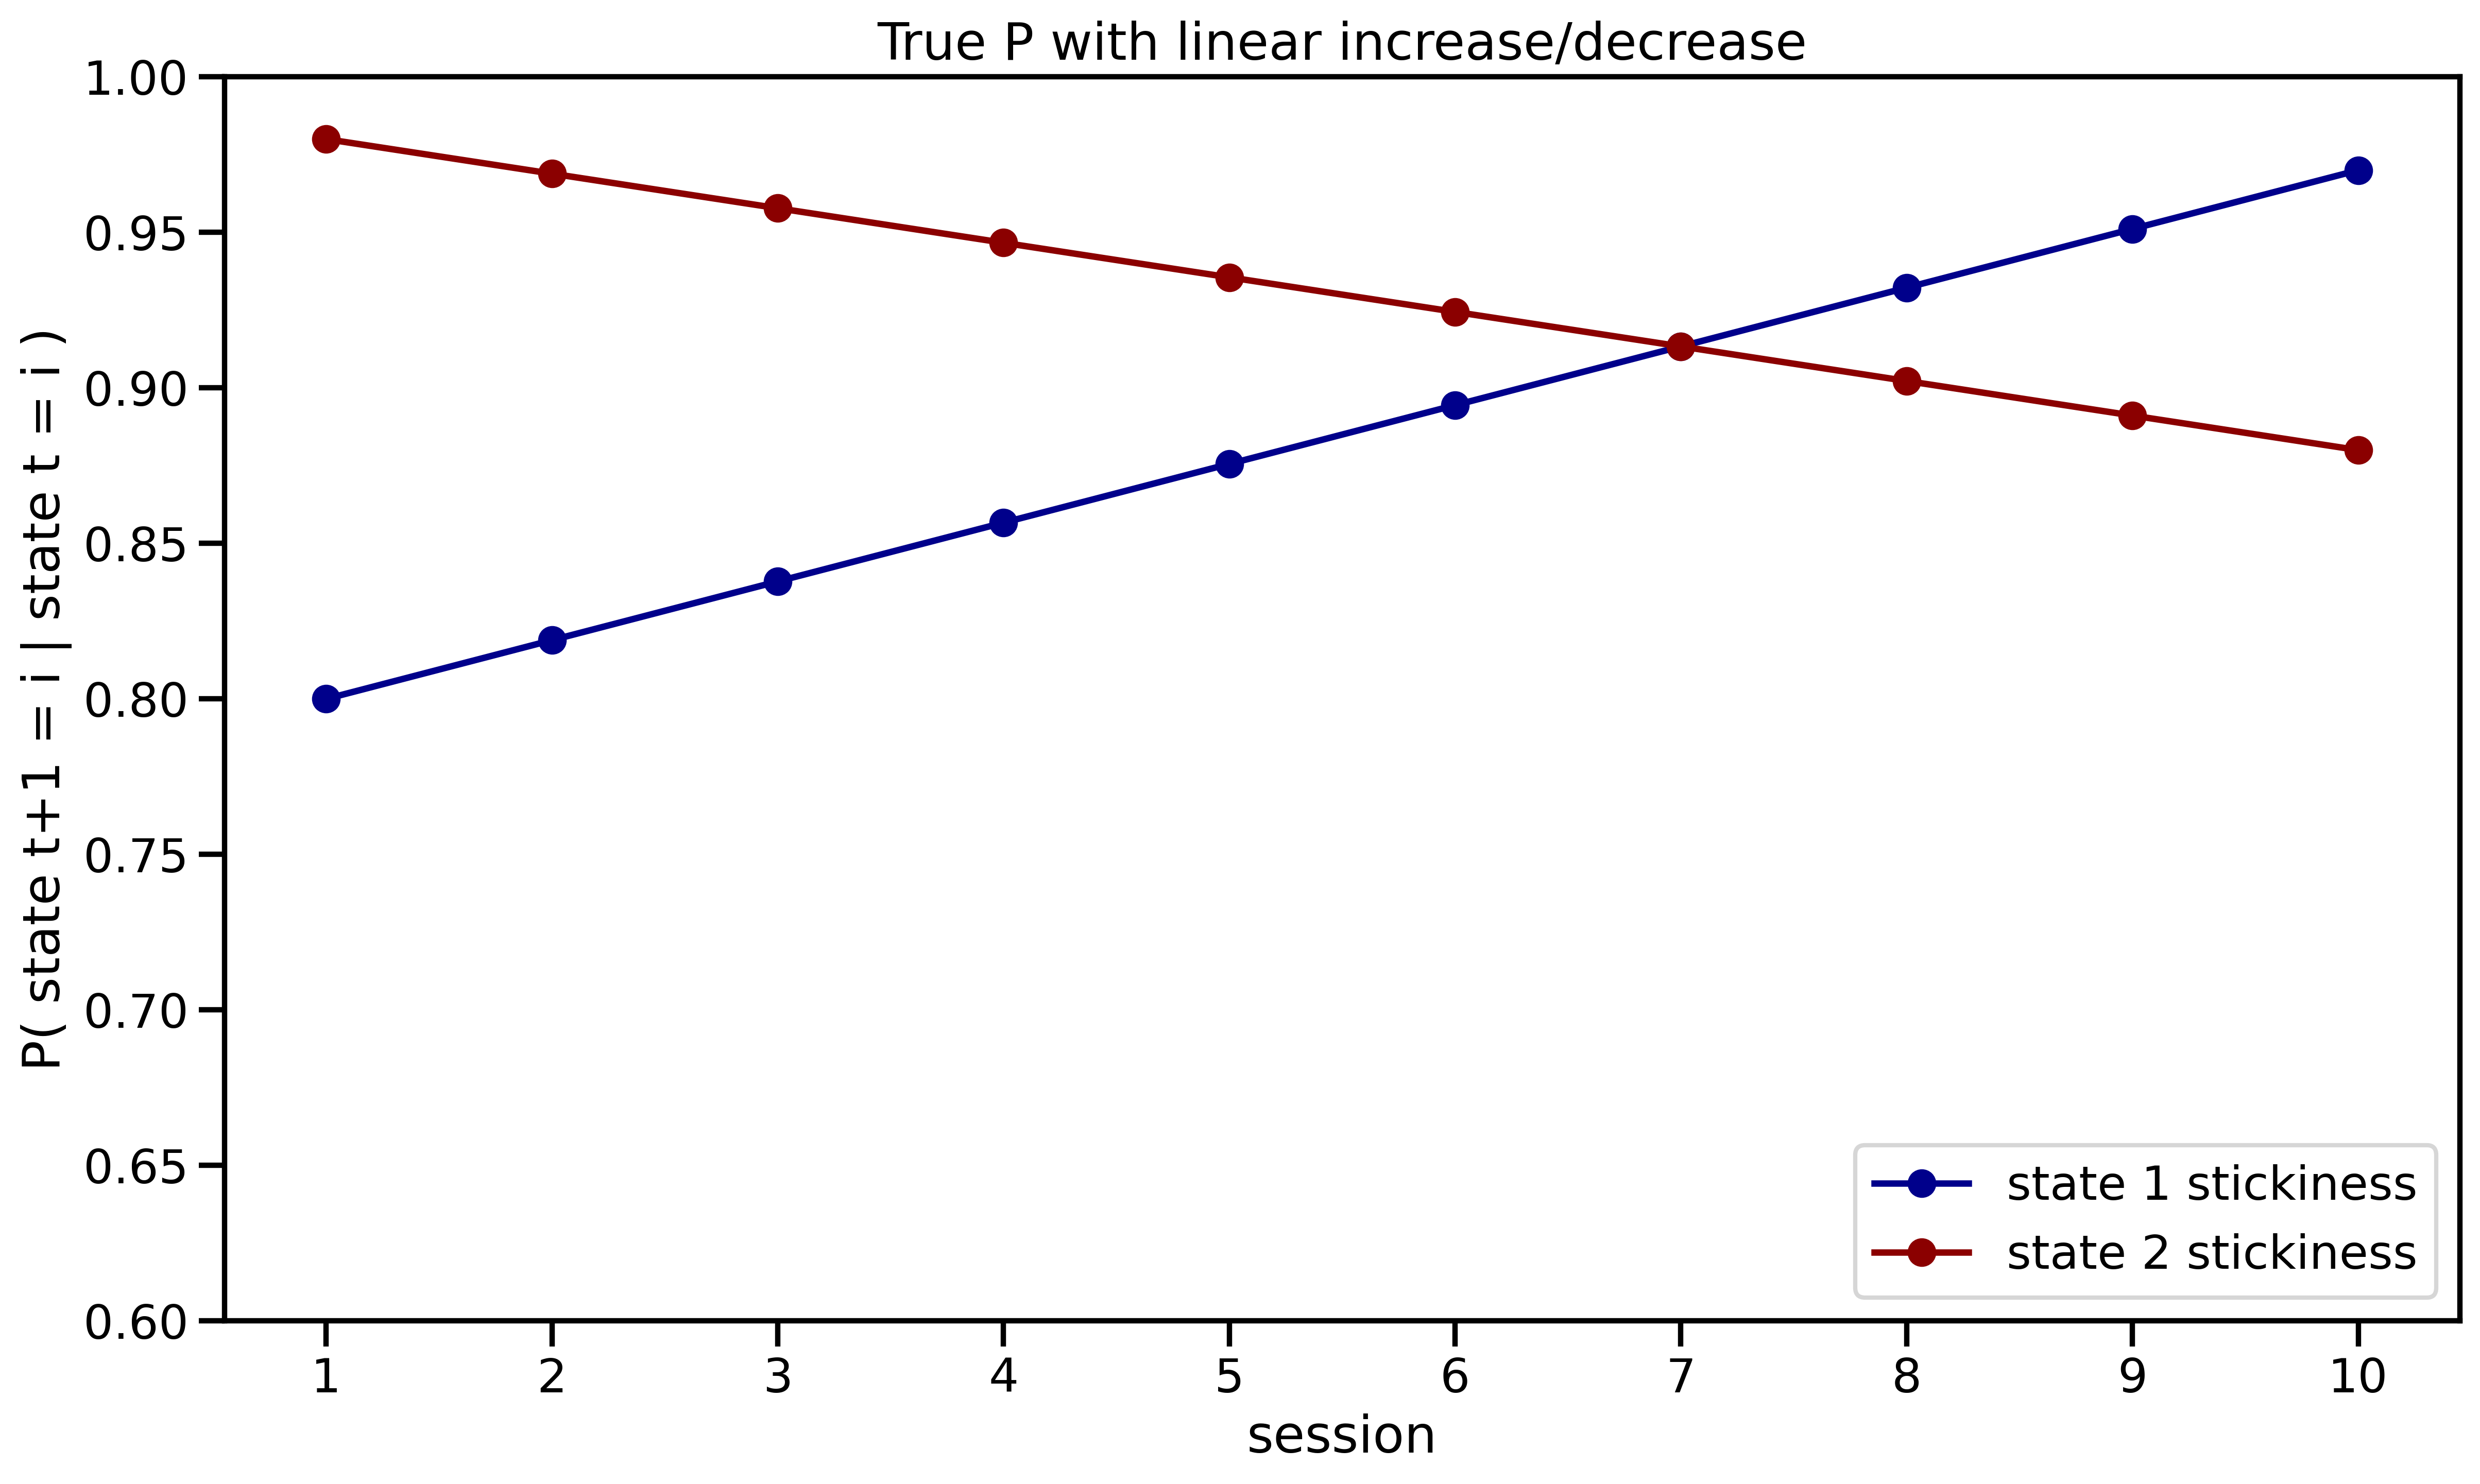

In [6]:
ourP = np.zeros((S,K,K))
ourP[:,0,0] = np.linspace(0.8,0.97,S) # state 1 sensory (increasing)
ourP[:,1,1] = np.linspace(0.98,0.88,S) # state 1 bias (decreasing)
ourP[:,0,1] = 1 - ourP[:,0,0]
ourP[:,1,0] = 1 - ourP[:,1,1]

trueP = np.zeros((N,K,K))
for sess in range(0,S):
    for t in range(0,T):
        trueP[sess*T+t] = ourP[sess]

fig, axes = plt.subplots(1, figsize = (14,8), dpi=400)
plotting_transition_matrix_stickiness(trueP, sessInd, axes, trueP=None, title=f'True P with linear increase/decrease', save_fig=False)

In [7]:
trainX = np.load(f'../data/N={N}_{K}_state_linearP_trainX.npy')
trainY = np.load(f'../data/N={N}_{K}_state_linearP_trainY.npy')
testX = np.load(f'../data/N={N}_{K}_state_linearP_testX.npy')
testY = np.load(f'../data/N={N}_{K}_state_linearP_testY.npy')
dGLMHMM = dglm_hmm2.dGLM_HMM2(N,K,D,C)
x, y, z = dGLMHMM.simulate_data(trueW, trueP, sessInd, save=False, title=f'N={N}_{K}_state_linearP_test', pi0=0.5)


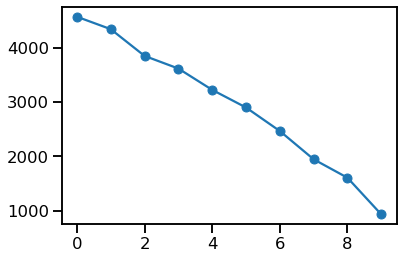

In [10]:
totalZ = np.zeros((len(sessInd)-1))
for s in range(0,len(sessInd)-1):
    totalZ[s] = np.sum(z[sessInd[s]:sessInd[s+1]])

plt.plot(range(0,len(sessInd)-1), totalZ, marker='o')
plt.show()
    